In [1]:
import os

In [2]:
# Load Images
# Data Directory
data_dir = 'data/SASE-FE/frames'
real = '../data/SASE-FE/frames/real'
fake = '../data/SASE-FE/frames/fake'
# List directories in real and fake
real_emotions = os.listdir(real)
fake_emotions = os.listdir(fake)

real_emotions.remove('.DS_Store')
fake_emotions.remove('.DS_Store')

In [3]:
# Length of real and fake emotions
print(len(real_emotions))
print(len(fake_emotions))


6
6


In [4]:
print("-------------------------")
print("Real emotions:\n")
# How many images in each emotion
for emotion in real_emotions:
    print(emotion, len(os.listdir(os.path.join(real, emotion))))

print("\n-------------------------")
print("Fake emotions:\n")

for emotion in fake_emotions:
    print(emotion, len(os.listdir(os.path.join(fake, emotion))))



-------------------------
Real emotions:

happy 5348
contempt 5222
sad 5407
surprise 5438
angry 5402
disgust 5307

-------------------------
Fake emotions:

happy 4937
contempt 5689
sad 5281
surprise 5187
angry 5850
disgust 5524


In [7]:
# Bar plot of emotions in real and fake
import matplotlib.pyplot as plt
import numpy as np

# Real emotions
real_emotions = os.listdir(real)
real_emotions.remove('.DS_Store')
real_emotions.sort()
real_emotions_count = []
for emotion in real_emotions:
    real_emotions_count.append(len(os.listdir(os.path.join(real, emotion))))

# Fake emotions
fake_emotions = os.listdir(fake)
fake_emotions.remove('.DS_Store')
fake_emotions.sort()
fake_emotions_count = []

for emotion in fake_emotions:
    fake_emotions_count.append(len(os.listdir(os.path.join(fake, emotion))))



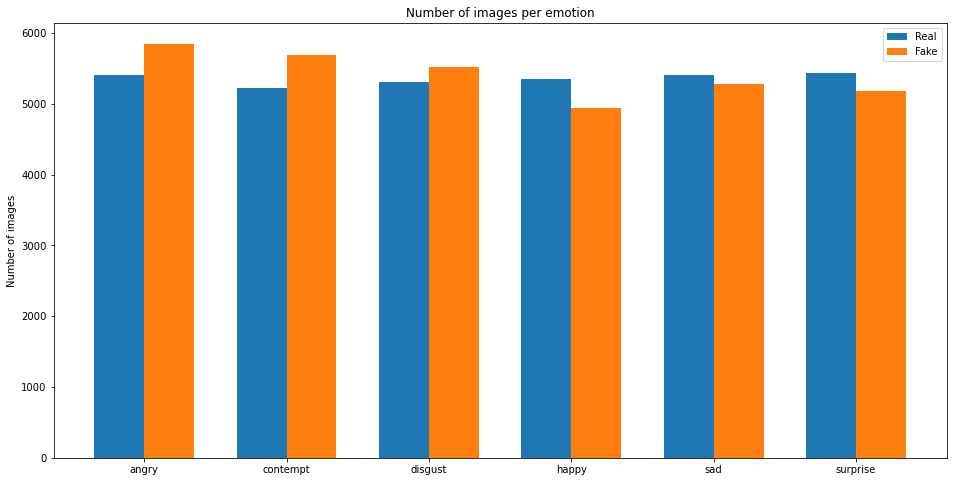

In [15]:
# Bar plot
x = np.arange(len(real_emotions))
width = 0.35

ax = plt.figure(figsize=(16, 8)).gca()
rects1 = ax.bar(x - width/2, real_emotions_count, width, label='Real')
rects2 = ax.bar(x + width/2, fake_emotions_count, width, label='Fake')

ax.set_ylabel('Number of images')
ax.set_title('Number of images per emotion')
ax.set_xticks(x)
ax.set_xticklabels(real_emotions)
ax.legend()

plt.show()

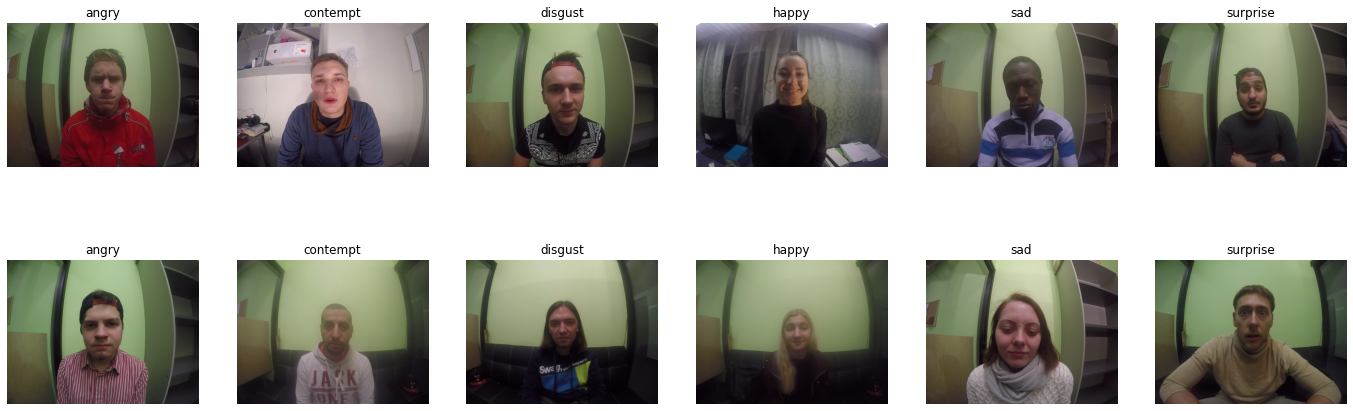

In [16]:
# Plot real and fake emotions images together
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(24, 8))
for i in range(6):
    plt.subplot(2, 6, i+1)
    img_1 = plt.imread(real + "/" + real_emotions[i] + "/" + os.listdir(real + "/" + real_emotions[i])[0])
    plt.imshow(img_1)
    plt.title(real_emotions[i])
    plt.axis("off")

    plt.subplot(2, 6, i+7)
    img_2 = plt.imread(fake + "/" + fake_emotions[i] + "/" + os.listdir(fake + "/" + fake_emotions[i])[0])
    plt.imshow(img_2)
    plt.title(fake_emotions[i])
    plt.axis("off")
plt.show()


In [17]:
# Show image details
img = plt.imread(real + "/" + real_emotions[0] + "/" + os.listdir(real + "/" + real_emotions[0])[0])
print("Image shape:", img.shape)


Image shape: (960, 1280, 3)


Reshaped image shape: (224, 224, 3)


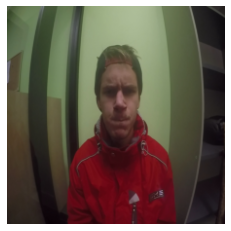

In [18]:
# reshpaing the image to 224 x 224
from skimage.transform import resize
img = resize(img, (224, 224))
print("Reshaped image shape:", img.shape)

# Plot reshaped image
plt.imshow(img)
plt.axis("off")
plt.show()


/Users/dim__gag/opt/anaconda3/lib/python3.9/site-packages/skimage/_shared/utils.py:348: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  return func(*args, **kwargs)


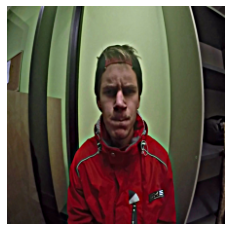

In [19]:
# Sharpen the image and zoom in the face
from skimage import filters
from skimage import exposure

# Sharpen the image
img_sharpen = filters.unsharp_mask(img, radius=3, amount=2)
plt.imshow(img_sharpen)
plt.axis("off")
plt.show()


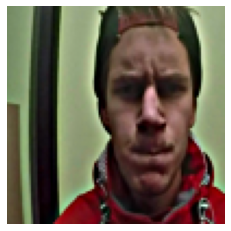

In [20]:
# Zoom in the face
img_zoom = img_sharpen[50:150, 50:150]
plt.imshow(img_zoom)
plt.axis("off")
plt.show()

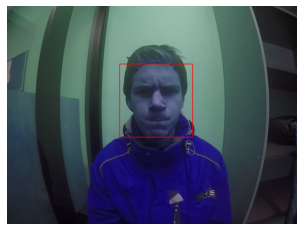

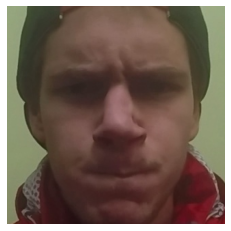

In [25]:
# Data Preprocessing to detect faces
import cv2

# Load the cascade
face_cascade = cv2.CascadeClassifier('../haarcascade_frontalface_default.xml')

# Read the input image
img = cv2.imread(real + "/" + real_emotions[0] + "/" + os.listdir(real + "/" + real_emotions[0])[0])

# Convert into grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Blur the image
gray = cv2.GaussianBlur(gray, (25, 25), 0)


# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.1, 4)

# Draw rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)


# Display the output
plt.imshow(img)
plt.axis("off")
plt.show()


for (x, y, w, h) in faces:
    faces = img[y+2:y+h-1, x+2:x+w-1]
    faces = cv2.cvtColor(faces, cv2.COLOR_BGR2RGB)
    plt.imshow(faces)
    plt.axis("off")
    plt.show()



